## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Source:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

## Question 1

#### Read the iris.csv file

In [2]:
data=pd.read_csv("iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [4]:
data['SepalLengthCm'].fillna(data.SepalLengthCm.median(),inplace=True)
data['PetalLengthCm'].fillna(data.PetalLengthCm.median(),inplace=True)
data['SepalWidthCm'].fillna(data.SepalWidthCm.median(),inplace=True)
data['PetalWidthCm'].fillna(data.PetalWidthCm.median(),inplace=True)

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [6]:
le=LabelEncoder()
data['species']=le.fit_transform(data['Species'])
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

<AxesSubplot:>

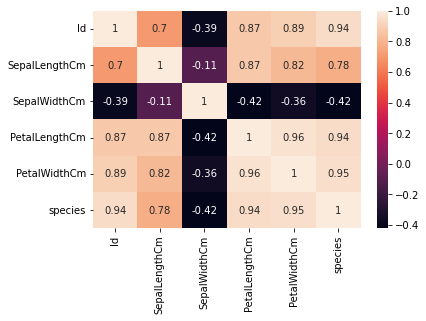

In [7]:
sns.heatmap(data.corr(),annot=True)

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [26]:
x=data.drop(['Id','Species','species'],axis=1)
y=data['species']
x.std()

SepalLengthCm    0.822584
SepalWidthCm     0.430757
PetalLengthCm    1.754000
PetalWidthCm     0.759698
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

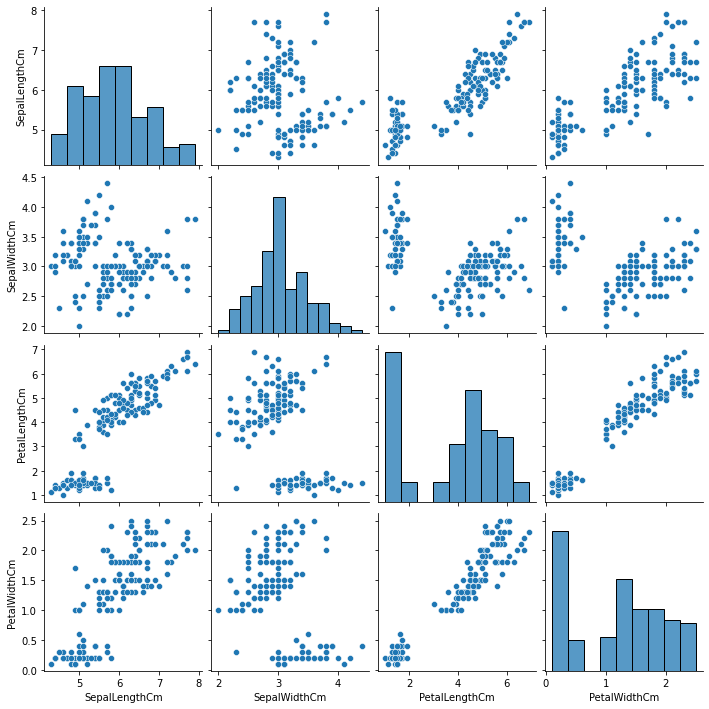

In [9]:
sns.pairplot(x)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [14]:

for i in [3,5,9]:
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(accuracy_score(y_test,y_pred))


0.9354838709677419
0.9354838709677419
0.9354838709677419


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

In [21]:
l=[]
for i in np.arange(1,20,2):
    knn = KNeighborsClassifier(i, metric = 'euclidean')
    score = cross_val_score(knn, x_train, y_train, cv = 5,scoring='accuracy')
    l.append(1-score.mean())

In [22]:
l

[0.05800000000000005,
 0.04133333333333322,
 0.04133333333333322,
 0.04133333333333322,
 0.04133333333333322,
 0.04133333333333322,
 0.04133333333333322,
 0.04133333333333322,
 0.04133333333333322,
 0.04966666666666664]

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

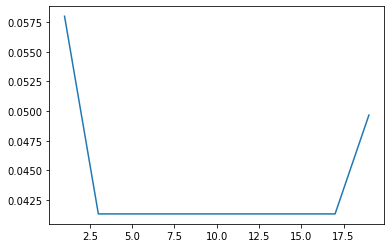

In [23]:
plt.plot(range(1,20,2),l)

# Naive Bayes

### Question 1
#### Import Iris.csv

### Question 2
#### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [24]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,4.7,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
147,6.5,3.0,5.20,2.0
148,6.2,3.4,5.40,2.3
149,5.9,3.0,5.10,1.8
150,5.9,3.0,4.35,1.3


In [27]:
y

0      0
1      0
2      0
3      0
4      0
      ..
147    2
148    2
149    2
150    2
151    2
Name: species, Length: 152, dtype: int64

## Question 3
#### Find the distribution of target variable (Class)
#### And, Plot the distribution of target variable using histogram

<AxesSubplot:>

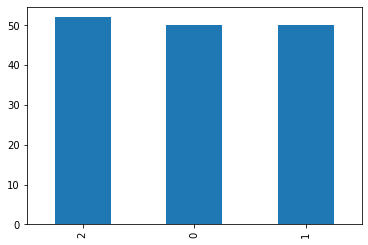

In [28]:
y.value_counts().plot(kind='bar')

### Plot the distribution of target variable using histogram

### Plot Scatter Matrix to understand the distribution of variables and give insights from it.

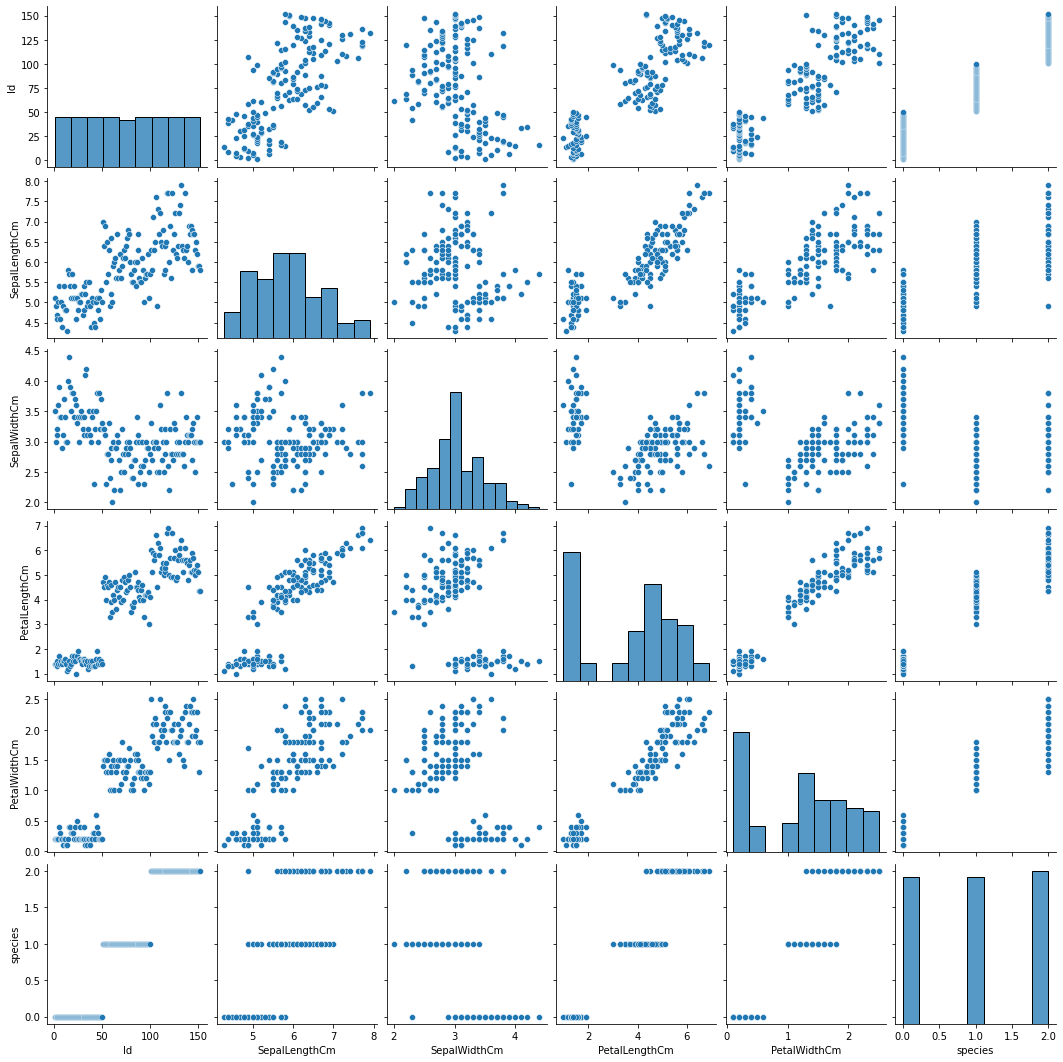

In [29]:
sns.pairplot(data)

### Question 3
#### Find Correlation among all variables and give your insights 

<AxesSubplot:>

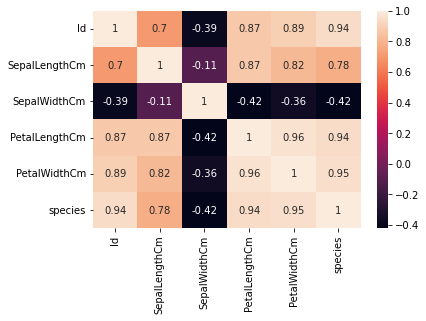

In [31]:
sns.heatmap(data.corr(),annot=True)

### Question 4
#### Split data in Training and Validation in 80:20

In [32]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=22)

### Question 5
#### Do Feature Scaling 

In [33]:

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

### Question 6 
#### Train and Fit NaiveBayes Model

In [37]:
nb=GaussianNB()
model=nb.fit(x_train,y_train)

### Question 7
#### Print Accuracy and Confusion Matrix and Conclude your findings

In [38]:
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.3548387096774194

In [39]:
confusion_matrix(y_test,y_pred)

array([[3, 6, 1],
       [4, 7, 0],
       [2, 7, 1]])